In [11]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [12]:
df  = pd.read_csv("/Users/omaraldakheel/Downloads/drawndata1.csv")

In [13]:
df.head(3)

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a


In [18]:
X = df[['x','y']].values
Y = df['z'] == "a"

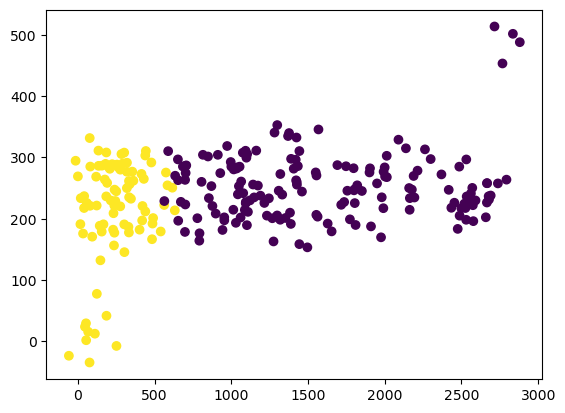

In [20]:
plt.scatter(X[:,0], X[:,1], c=Y);

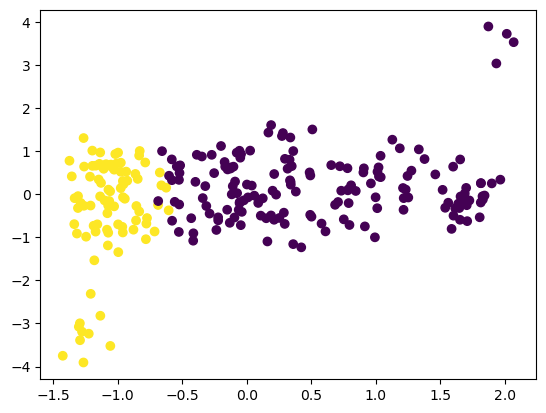

In [22]:
from sklearn.preprocessing import StandardScaler
X_new = StandardScaler().fit_transform(X)
plt.scatter(X_new[:,0], X_new[:,1], c=Y);

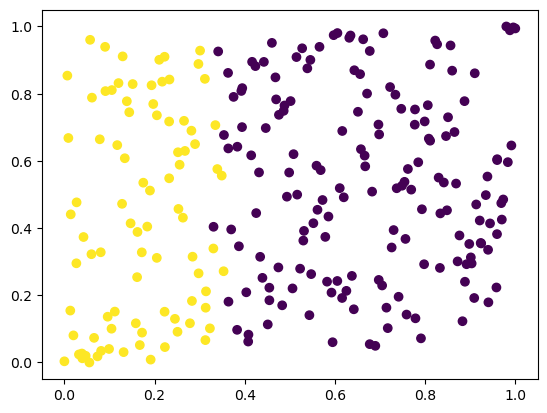

In [24]:
from sklearn.preprocessing import QuantileTransformer
X_new = QuantileTransformer(n_quantiles=100).fit_transform(X)
plt.scatter(X_new[:,0], X_new[:,1], c=Y);

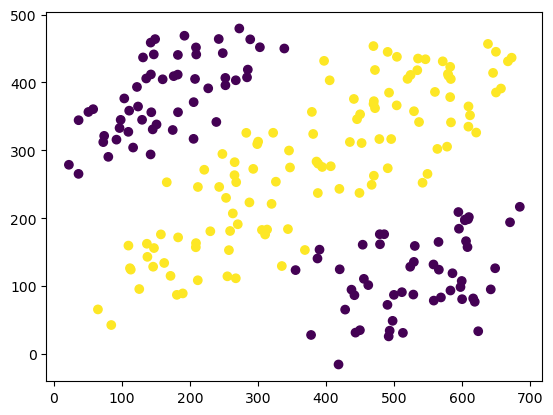

In [26]:
df = pd.read_csv("/Users/omaraldakheel/Downloads/drawndata2.csv")
X = df[['x','y']].values
Y = df['z'] == "a"
plt.scatter(X[:,0], X[:,1], c=Y);

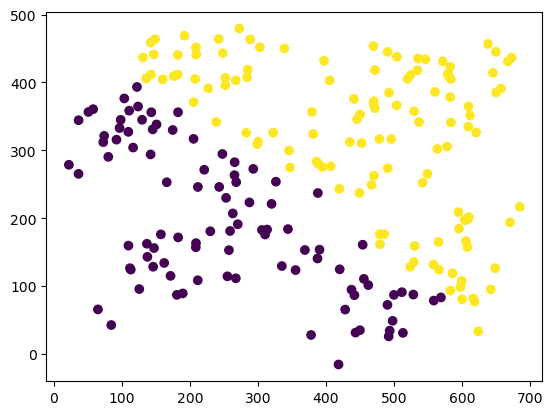

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", QuantileTransformer(n_quantiles=100)),
    ("model", LogisticRegression())
])

pred = pipe.fit(X,Y).predict(X)
plt.scatter(X[:,0], X[:,1], c=pred);

# Using A non-linear seperator pipeline

## linear: (x1 x2) vs Nonlinear: (x1x2) (x1^2 x2^2)

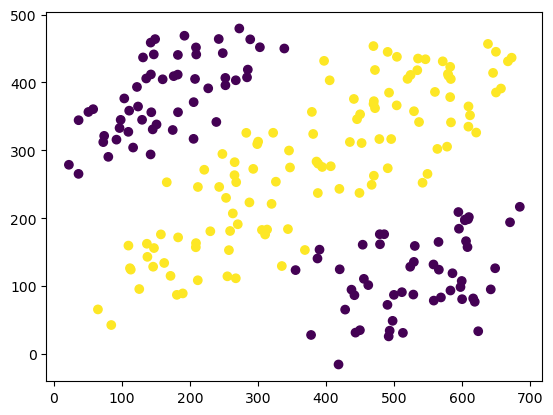

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", PolynomialFeatures()),
    ("model", LogisticRegression())
])

pred = pipe.fit(X,Y).predict(X)
plt.scatter(X[:,0], X[:,1], c=pred);

In [33]:
# affects of adding a single preprocing step of polynomialFeatures